# UCI Heart Disease K-Means Project

## Overview - Dori

Our group aim to predict the presence of heart disease by clustering on the heart disease datasets. We chose to cluster the data using Unsupervised Machine Learning Algorithm such as K-means, Principal Component Analysis(PCA), and we will perform K-means after PCA. We will use all of heart disease data to perform clustering on it and compare the results through accuracy scores and run-times for pre-PCA KMeans and post-PCA Kmeans to study performance

## Introduction - Dori
We will use heart disease dataset from UCI repository clustering datasets. For the heart disease datasets, it actually has 76 attributes, but we will only be using 14 attributes. The 14 dimensions, which are: age (in years), sex(1=male, 0=female), dataset( where the dataset come from 3 different places such as: V.A. Medical Center, Long Beach and Cleveland), cp( chest pain type: typical angina, atypical angina, non-anginal pain, asymptomatic), trestbps(resting blood pressure in mm Hg on admission to the hospital), chol(serum cholestoral in mg/dl), fbs(fasting blood sugar > 120 mg/dl), restecg(resting electrocardiographic results), thalch(maximum heart rate achieved), exang(exercise induced angina), oldpeak(ST depression induced by exercise relative to rest), slope(the slope of the peak exercise ST segment), ca(number of major vessels from 0-3 colored by flourosopy), thal(normal, fixed defect, reversable defect), and num(diagnosis of heart disease - angiographic disease status). 

To cluster the data, we will use 2 algorithms which are k-means and principal component analysis(PCA). K-means is a simple but effective algorithm where we will partitions the data in to K cluster and we will update it using iterative batch algorithm. PCA is the simplest method where we will find a linear subspace greatest projected variance and useful to reduced subspace that contains most of the variance

### Imports and Reading CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Data Cleaning - Shania/Tiffany
- Removing categorical variables and id
- Removing entries with missing data/null values
- Standardizing the dataset using standard scaler
- Separating the data into X, which contains all the variables and Y, which is the target column

In [3]:
df = df.drop(columns='id', axis=2)
# checking columns with the most frequent null values
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
# dropping columns with the most null values
df = df.drop(columns=['ca', 'slope', 'thal'], axis=1)

In [5]:
# checking data frame information after dropping null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [6]:
# dropping columns with categorical values
df = df.drop(columns= df.select_dtypes(['object']).columns, axis=1)

In [7]:
# checking data frame information after dropping categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   trestbps  861 non-null    float64
 2   chol      890 non-null    float64
 3   thalch    865 non-null    float64
 4   oldpeak   858 non-null    float64
 5   num       920 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 43.2 KB


In [8]:
# dropping rows containing null values
df = df.dropna()

In [9]:
# checking final dataframe form after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 919
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       827 non-null    int64  
 1   trestbps  827 non-null    float64
 2   chol      827 non-null    float64
 3   thalch    827 non-null    float64
 4   oldpeak   827 non-null    float64
 5   num       827 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 45.2 KB


In [10]:
# standardizing dataset
X = df.drop(['num'], axis=1)
y = df['num']
col = X.columns

# perform standard scaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X[col]))
X.columns = col
X

,age,trestbps,chol,thalch,oldpeak
0,1.050186,0.679000,0.291349,0.474814,1.295742
1,1.478336,1.467744,0.773058,-1.152115,0.564039
2,1.478336,-0.635573,0.254994,-0.338651,1.570131
3,-1.732793,-0.109744,0.445860,1.908061,2.393296
4,-1.304643,-0.109744,0.027772,1.327015,0.472576
...,...,...,...,...,...
822,0.943148,1.362578,-0.281249,0.009977,-0.807903
823,-0.769454,0.100588,0.991191,-0.454860,-0.807903
824,0.086847,-0.267493,1.200235,0.629759,-0.807903
825,0.193884,-0.530407,0.200460,-1.462007,-0.807903


## K - Means - Cory
Running K-means with K=5 (num column [0=no heart disease; 1,2,3,4 = stages of heart disease

-dependent variables are age, trestbps, chol, thalch, oldpeak -> want to see how grouped  
-predictions (Y) are num column: diff levels of heart disease

* age - expressed in years
* trestbps - resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol - (serum cholesterol in mg/dl)
* thalach - maximum heart rate achieved
* oldpeak - ST depression induced by exercise ST segment

In [11]:
def calcSqDistances(X, Kmus):
    # k number of Kmus
    #need to find minimum distance from X[][] to Kmus
    #need to find closest Kmus and calulate distance
    dist = np.zeros((np.shape(X)[0],np.shape(Kmus)[0]))
    for k in range(0,Kmus.shape[0]):
        for n in range(0,X.shape[0]): # changed from 0
            dist[n][k] = (X[n][0]-Kmus[k][0])**2 + (X[n][1]-Kmus[k][1])**2 + (X[n][2]-Kmus[k][2])**2 + (X[n][3]-Kmus[k][3])**2 + (X[n][4]-Kmus[k][4])**2
    return dist

In [12]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m] 

In [13]:
def recalcMus(X, Rnk):
    # need K newMus
    # rnk gives us our binary Rnk matrix saying which points are closest to oldMus
    # initialize newMu array to dimension of K columns (usually 2x2)
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

In [14]:
X = X.to_numpy()
y = y.to_numpy()

In [15]:
# k-means algorithm
def runKMeans(K,X):
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector as per Bishop (9.2)
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        # given the matrix of squared distances, determine the closest cluster
        # center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # per Bishop (9.2)
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)
        
        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break
            
    return Rnk, Kmus
    # now we have 5 cluster centers
    # we want to see if each num=1's are in the same cluster as expected or not
    # Rnk shows us where each datapoint is closest to which cluster
   

In [16]:
Rnk, Kmus = runKMeans(5,X)

# matrix to tell us which cluster is for what num 
# how accurate k-means was based on distribution of numbers
count = np.zeros((5,5))
    
for col in range(0,Rnk.shape[1]):
    for row in range(0,Rnk.shape[0]):
        if (Rnk[row][col] == 1):
            if (y[row] == 0):
                count[0][col] += 1
            elif (y[row] == 1):
                count[1][col] += 1
            elif (y[row] == 2):
                count[2][col] += 1
            elif (y[row] == 3):
                count[3][col] += 1
            elif (y[row] == 4):
                count[4][col] += 1
count

array([[ 15.,  22.,  49., 156., 129.],
       [ 47.,  66.,  38.,  29.,  64.],
       [ 34.,  28.,   9.,   3.,  25.],
       [ 29.,  37.,   7.,   4.,  12.],
       [  5.,  14.,   1.,   1.,   3.]])

Count matrix rows are for num (diff levels of heart disease) and columns are for 5 cluster centers from K-means.

We assume that if data was clustered well, each cluster would have only one num associated with it. Results of count matrix shows that the K-means did not do that well since cluster numbers are distributed across different nums.

## PCA - Shahab

In [17]:
def eigsort(V, eigvals):
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)

    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

Data shape: (5, 827)
Mean shape: (5, 1)
mean subtracted data(Z): (5, 827)
covmatrix: (5, 5)
sortV: (5, 5)
transform PCA:  (2, 827)
transform2 PCA:  (827, 2)


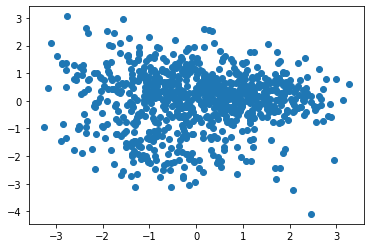

In [18]:
x = X
x = x.T
print("Data shape:", x.shape)

#finds the mean of each dimension
mean = np.mean(x, axis=1).reshape(5,1)
print("Mean shape:", mean.shape)

# calcuclates the matrix of mean subtracted points
Z = x - mean
print("mean subtracted data(Z):", Z.shape)

# calculates the covariance matrix
covmatrix = 1/(len(x[0]))*np.matmul(Z,Z.T)
print("covmatrix:", covmatrix.shape)

#calculates eigenvalues
eigvals, V = np.linalg.eig(covmatrix)
sortV, sortD = eigsort(V, eigvals)
print("sortV:", sortV.shape)

#transforms the entire dataset using top 2 principal components
transform = (sortV[:,0:2].T.dot(Z))
print("transform PCA: ", transform.shape)

#transforms the entire dataset using top 2 principal components
transform2 = (Z.T.dot(sortV[:,0:2]))
print("transform2 PCA: ", transform2.shape)

plt.plot(transform[0], transform[1], "o")

## K-Means after PCA - Cory

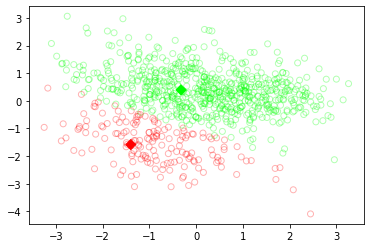

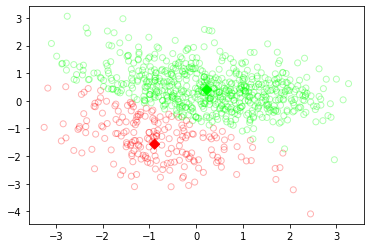

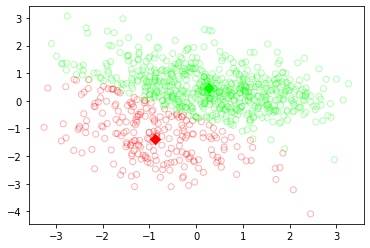

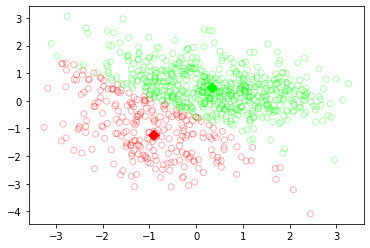

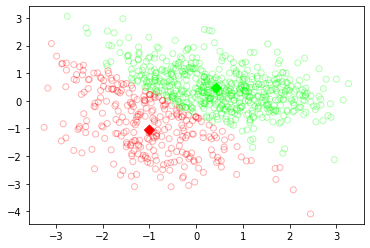

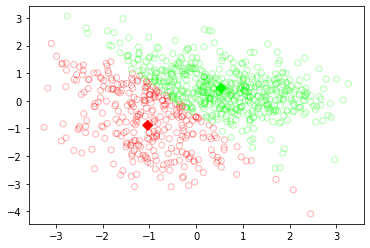

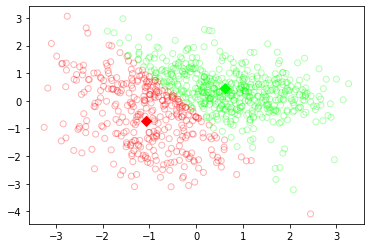

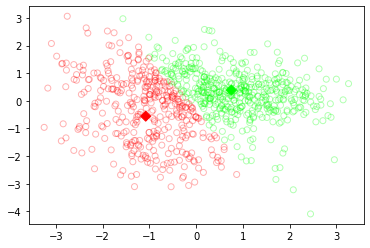

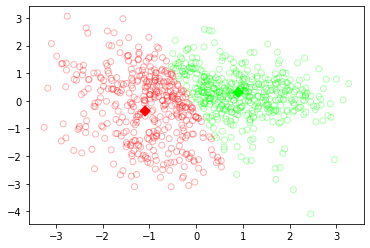

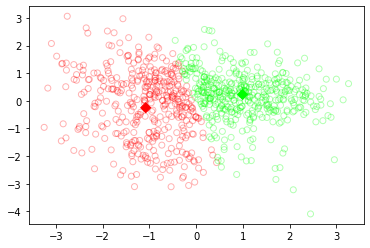

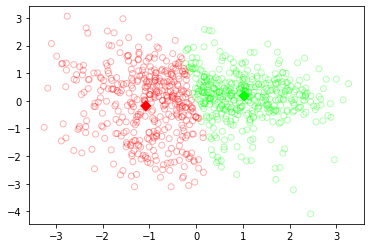

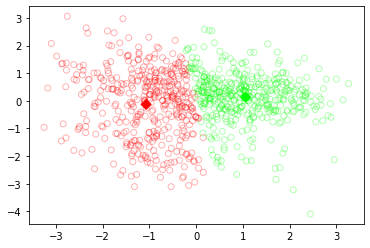

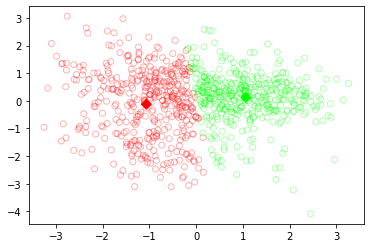

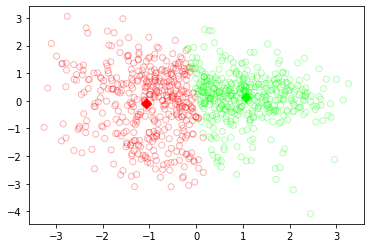

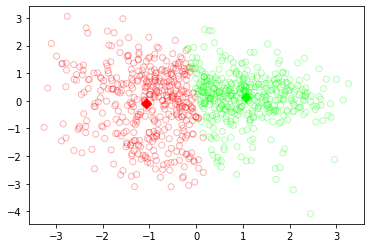

In [19]:
# apply k-means to reduced matrix
#X_reduced = reduced.T

def calcSqDistances(X, Kmus):
    
    dist = np.zeros((np.shape(X)[0],np.shape(Kmus)[0]))
    for k in range(0,Kmus.shape[0]):
        for n in range(0,X.shape[0]): # changed from 0
            dist[n][k] = (X[n][0]-Kmus[k][0])**2 + (X[n][1]-Kmus[k][1])**2
    return dist

def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

def runKMeans(K, X):
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    return plotCurrent(X,Rnk,Kmus)

runKMeans(2, transform2)

## Comparative Data Analysis - Shadman
Run test set on our k-means to get accuracies. Compare these accuracies as well as runtimes

In [20]:
# Running the KMeans function excluding the graphing function, to calculate accuracies
def runKMeans(K, X):
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break
    
    return Rnk

In [21]:
# Importing the accuracy_score metric to calculate accuracies
from sklearn.metrics import accuracy_score

# Setting the 'num' column as the true labels
labels = np.array(df.get('num'))

# Function to calculate accuracies based on true labels and assigned labels
def accuracy(kmeans_labels, real_labels):
    same = np.sum(kmeans_labels == labels) / len(labels)
    different = np.sum(kmeans_labels != labels) / len(labels)
    accuracy = max(same, different)
    print("Accuracy:", accuracy)

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
%%time

# Running KMeans on the pre-PCA data
kmeans_labels_pre = runKMeans(5, X)

# Calculating the accuracy score of the pre-PCA data
accuracy(kmeans_labels_pre[:,0], labels)

Accuracy: 0.5937122128174124
CPU times: user 176 ms, sys: 4.1 ms, total: 180 ms
Wall time: 189 ms


In [24]:
%%time

# Running KMeans on the post-PCA data
kmeans_labels_post = runKMeans(2, transform2)

# Calculating the accuracy score of the post-PCA data
accuracy(kmeans_labels_post[:,0], labels)

Accuracy: 0.5042321644498187
CPU times: user 80.2 ms, sys: 3.7 ms, total: 83.9 ms
Wall time: 160 ms


As we can see from the calculation of the accuracies, shown above, the KMeans algorithm was a little inaccurate before PCA was applied on the data. However, after the application of PCA, KMeans did a slightly better job with the post-PCA data. Studying the run-times, we can see that KMeans ran much slower with the pre-PCA data, whereas, it took a little bit less time to compute KMeans on the post-PCA data.

## Conclusion - Dori/Shadman

After performing KMeans, an unsupervised learning algorithm, on our heart disease data, obtained from the UCI Repository, at first before applying Principal Component Analysis (PCA) and once again after performing PCA on our data, we have been able to compute accuracy scores and run times to analyze the best approach to cluster our dataset. It appears from the results that by performing PCA first and then using the KMeans algorithm, the clustering is slightly more accurate, while also consuming less time to compute. On the other hand, if we directly use KMeans on the dataset, not only it computes slower, but the resulting accuracy is also a bit lower. This result is not absolute, however, since if KMeans is performed multiple times, the results can get a bit unstable. Moreover, the overall accuracy still wasn't very high even after PCA was applied first to the dataset and then KMeans was used. As such, we think other unsupervised machine learning algorithms such as Mixtures of Gaussians, etc. would do a better job at clustering this dataset.